## Description about dataset:

1. The Dataset consists of marks in 2 subjects, based on which the admission to university is decided
2. First 2 values in a row indicates marks in 2 subjects, and the last value in a row indicates whether that person got admission or not (1 and 0)
3. Develop a logistic regression model

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('marks.txt', header=None)

In [4]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# filter out the applicants that got admitted
admitted = data.loc[y == 1]

#filter out the applicants that didn't get admission
not_admitted = data.loc[y == 0]

In [6]:
admitted

,0,1,2
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


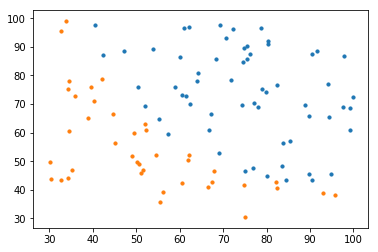

In [10]:
plt.scatter(admitted.iloc[:,0], admitted.iloc[:,1], s=10, label = 'Admitted')

plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s=10, label = 'Not Admitted')

#plt.legend()
plt.show()

In [11]:
#occum razor

In [12]:
#quadratic equation

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [14]:
# fitting logistic regression to the training set
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred = regressor.predict(x_test)
print(y_pred)
#print(y_test)

[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1]


In [17]:
regressor.coef_

array([[0.03032132, 0.03124498]])

In [18]:
regressor.intercept_

array([-3.4294559])

In [19]:
# create confusion matrix, roc

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is: ', cm, sep='\n')

Confusion Matrix is: 
[[ 7  1]
 [ 0 12]]


In [22]:
score = regressor.score(x_test, y_test)
print(score)

0.95


In [24]:
probs = regressor.predict_proba(x_test)
probs

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [25]:
from sklearn import metrics
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9895833333333334


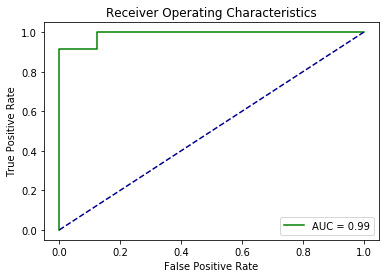

In [28]:
# plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
from sklearn.datasets import load_boston

In [30]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

In [31]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
boston_df['Price'] = boston.target
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
x = boston_df.drop('Price',axis=1)

In [34]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
y = boston_df.iloc[:,-1]

In [36]:
x.shape

(506, 13)

In [37]:
y.shape

(506,)

In [48]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [49]:
from sklearn.linear_model import LinearRegression #for linear regression

In [50]:
reg = LinearRegression()

In [51]:
reg = reg.fit(x_train, y_train)

In [52]:
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Intercept: 37.937107741833316


In [57]:
#predicting the values for the test set
y_pred = reg.predict(x_test) #the is predicting the values for the xtest
print(x_test) #Test dataset
print(y_test) #actual y-values from test set
print(y_pred) #predicted y-values for test set

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724   0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425   0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170   0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
340   0.06151   0.0   5.19   0.0  0.515  5.968   58.5  4.8122   5.0  224.0   
310   2.63548   0.0   9.90   0.0  0.544  4.973   37.8  2.5194   4.0  304.0   
102   0.22876   0.0   8.56   0.0  0.520  6.405   85.4  2.7147   5.0  384.0   
418  73.53410   0.0  18.10   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
411  14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275  2

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 5.21497514537542


In [59]:
r2 = r2_score(y_test,y_pred)
print('Regressor Score is =',r2)

Regressor Score is = 0.6733825506400175
